# Opérations sur les spectrogrammes

In [25]:
import numpy as np
import numpy.matlib
import math
from scipy.io import wavfile
from matplotlib import pyplot as plt
from IPython.display import Audio
from numpy import matlib

## Chargez le fichier f5_bruit.wav

In [2]:
#chargement d'un fichier audio avec bruit
wav='f5_bruit.wav'
fs, data = wavfile.read(wav) #fs: fréquence d'échantillonnage 
data=data/max(abs(data)) #normaliser le signal entre -1 et 1
duree=len(data)/fs   #durée du signal en secondes
print('Frequence d\'échantillonnage:',fs,'Hz, durée:',duree,'sec')
display(Audio(data,rate=fs,autoplay=True))

Frequence d'échantillonnage: 22050 Hz, durée: 3.0 sec


Autre affichage :

Longueur audio: 3.00 secondes


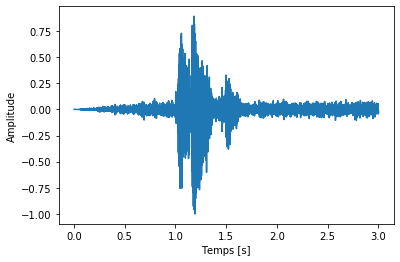

In [13]:
N = len(data)
L = N / fs
print(f'Longueur audio: {L:.2f} secondes')
fig, ax = plt.subplots()
ax.plot(np.arange(N) / fs, data)
ax.set_xlabel('Temps [s]')
ax.set_ylabel('Amplitude');

In [50]:
#Fonctions utiles

def spectrogram(x,T,p,window=None,fftsz=None):
    n=len(x) #taille de x
    m=len(np.arange(0,n-T,p)) #estimation du nombre de fenêtres
    S=np.zeros((m,T))

    if fftsz is None: fftsz=T #si vide on prend la valeure de T
    if window is None: window=np.ones(T) #si vide on prend des 1
    
    #début fenêtrage
    for i in range(m):
        S[i,:]=x[i*p:i*p+T]*window
            
    #Transformée de Fourier        
    S=np.fft.fft(S,fftsz)
    
    amp=np.abs(S) #spectre d'amplitude
    phase=np.angle(S) #spectre de phase
    
    return amp,phase

def afficher_spectre(amp,n,titre):
    f, ax = plt.subplots(figsize=(10,6))
    S = np.log10(amp.T[:int(w/2),:]/(2**15)+1)
    ax.set_title(titre)
    ax.imshow(S,origin='lower',cmap="gray_r",extent=(0,n/10/(1024*2),0,1024/2))
    ax.axis('tight')
    ax.set_ylabel('Frequence [Hz]')
    ax.set_xlabel('Temps [secondes]');



## Affichez le spectrogramme du fichier f5_bruit.wav (sans préaccentuation ni hamming) 
## Affichez son énergie
## Choisissez une valeur pour le seuil de silence


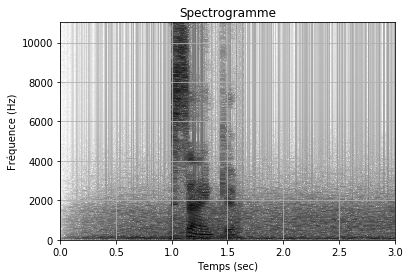

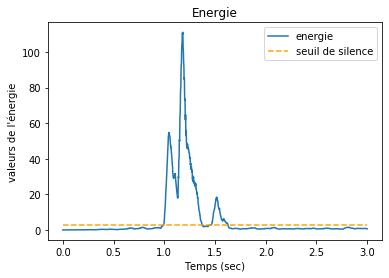

In [53]:
#Cette fonction affiche un spectrogramme d'amplitude S
#fs: fréquence d'échantillonnage du signal, duree: durée du signal en secondes
#log: afficher le log du spectre 
def affich(S,fs,duree,log=True,maxfreq=None):
    (n,m)=S.shape #Nombre de lignes et colonnes de la matrice du spectre
    if maxfreq is None:
        maxfreq=fs/2 #couper le spectre en 2 (effet mirroir)
    
    maxindice=int(maxfreq*m/fs) #convertir maxfreq de Hz à indice
    
    if(log):
        S=np.log10(abs(S)+1) #calcul du log pour l'affichage
    
    S=S[:,:maxindice] #couper le spectre en frequence max
    
    freq=np.linspace(0, maxfreq, maxindice) #labels de l'axe des fréquences
    temps=np.linspace(0, duree,n) #labels de l'axe du temps
    
    plt.pcolormesh(temps, freq, S.T, cmap='gray_r')  #afficher le spectre sans correction des axes
    plt.ylabel('Fréquence (Hz)')
    plt.xlabel('Temps (sec)')
    plt.grid()
    plt.show()
    
##Cette fonction calcul l'énergie du signal
def energy(data, T, p):
    amp,phase=spectrogram(data,T,p)   #passage au domaine fréquentiel
    e=np.mean(amp**2,axis=1) #calcul de la moyenne des amplitudes au carée
    return e

####################### test d'affichage ##############################
T=1024
p=32
amp,phase=spectrogram(data,T,p,window=T)  #calcul du spectrogramme
plt.title('Spectrogramme')
affich(amp,fs,duree) #affichage du spectrogrammme


E=energy(data, T, p) #calcule de l'énergie
seuil=3  #on choisit une valeur pour le seuil, si energie < seuil -> silence

#dessin de l'énergie
plt.title('Energie')
temp=np.linspace(0, duree, len(E))    #j'ai introduit une petite variable nommé temp
plt.plot(temp,E) #affichage de l'énergie
plt.plot([0,duree],[seuil,seuil],color='orange',linestyle='dashed') #dessiner le seuil
plt.ylabel('valeurs de l\'énergie')
plt.xlabel('Temps (sec)')
plt.legend(['energie','seuil de silence'])
plt.show()

## découpez du spectrogramme les parties silences  (enregie<seuil)
## estimez le profile du bruit (voir le cours et l'exemple numérique)


j'ai essayer deux différents méthode mais le résultat rest à desirer malheuresment

Methode 1

IndexError: too many indices for array

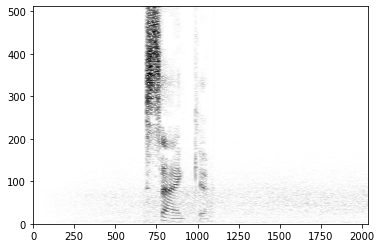

In [70]:
s=spect(data,w,p,n,ham=True,prea=True,lg=True)
absS=np.abs(s)
seuil=3
Lebruit=absS[:,E<seuil]
plt.pcolormesh(np.log10(s=Lebruit[:,:]+1),cmap='gray_r')
plt.show()

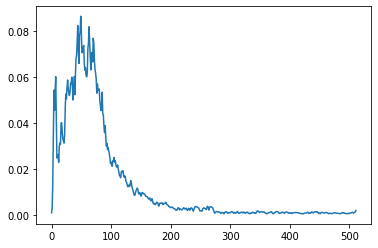

In [65]:
#profile bruit
pbb=np.mean((absS[:,E<seuil]),axis=1)
plt.plot(pb)

Méthode 2

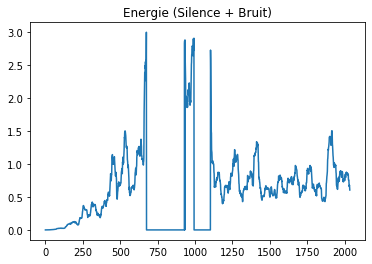

In [12]:
E[E<seuil] = 0 # remettre les valeurs inferieur au seuil à 0, afin d'avoir l'énergie du bruit + silence

id = np.where(E==0) # récuperer les indices du silence (+bruit)

silence_bruit = amp.T[:,id[0]] 
profil_bruit = np.mean(silence_bruit, axis=1) # calcul du profil du bruit


plt.plot(E)
plt.title('Energie (Silence + Bruit)')
plt.show()

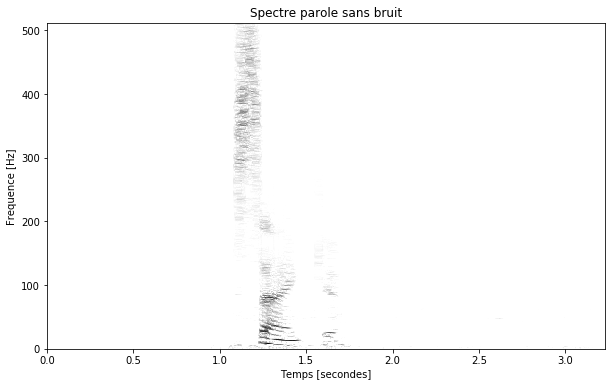

In [51]:
sans_bruit = amp - profil_bruit # retrancher le bruit
sans_bruit[sans_bruit<0] = 0 # remettre les valeurs négatives à 0
afficher_spectre(sans_bruit,N,'Spectre parole sans bruit')

## Choisissez une valeur pour alpha et faite la soustraction entre le spectrogramme et le profile
## affichez le spectre filtré et reconstituez le signal temporel à écouter
## s'il y a encore du bruit essayez d'augmenter alpha

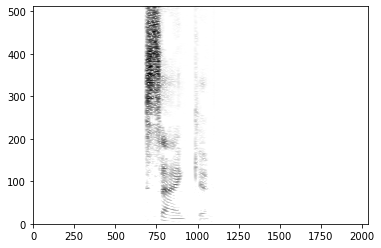

In [66]:
alpha=4
s=spect(data,w,p,n,ham=True,prea=True,lg=True)
absS=np.abs(s)
sous=absS.T-alpha*pbb
sous[sous<0]=0
plt.pcolormesh(sous.T[0:512],cmap='gray_r')
display(Audio(data,rate=fs,autoplay=True))